# Get distance matrices

We need to get different distance matrices (alpha, beta, and combined).

In [538]:
import pandas as pd
df = pd.read_csv('./data/vdjdb.txt', sep="\t")

In [539]:
# Select the columns we need
selected_features = df[['complex.id', 'gene','cdr3','v.segm','j.segm','species','mhc.a','mhc.b','mhc.class','antigen.epitope','antigen.species','vdjdb.score']]

In [540]:
# Select all human data
human_data = selected_features[(selected_features['species'] == 'HomoSapiens') & (selected_features['vdjdb.score'] > 0)]

# Drop duplicate rows
human_data = human_data.drop_duplicates()

# Delete rows with null values
human_data  = human_data.dropna()
# Print all data
human_data.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,HIV-1,2


# Distance matrix for beta chains

In [541]:
# get beta chains only
TRB = human_data[human_data['gene'] =='TRB']
# rename the columns for our beta chain matrix calculation
beta_chains = TRB[['cdr3', 'v.segm', 'j.segm','antigen.epitope']]
beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)
beta_chains

C:\Users\adnan\AppData\Local\Temp\ipykernel_4188\3734287296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)


,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope
1,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
2,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
4,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
6,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
8,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,FLKEKGGL
...,...,...,...,...
92682,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,PQPELPYPQPQL
92684,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,FPQPEQPFPWQP
92686,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,FPQPEQPFPWQP
92690,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,QLQPFPQPELPY


In [542]:
from tcrdist.repertoire import TCRrep
# calculate distances for our beta chains
tr = TCRrep(cell_df = beta_chains, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cell_df['count'] = 1


In [543]:
beta_chain_matrix = tr.pw_cdr3_b_aa # fetch the beta chains for the matrix

In [544]:
beta_distances = pd.DataFrame(beta_chain_matrix) # create matrix

In [545]:
beta_distances # print matrix

,0,1,2,3,4,5,6,7,8,9,...,4649,4650,4651,4652,4653,4654,4655,4656,4657,4658
0,0,38,36,32,36,38,34,36,36,36,...,31,34,36,20,46,36,23,40,34,33
1,38,0,23,26,24,7,31,32,28,36,...,26,24,27,28,56,32,24,40,32,36
2,36,23,0,30,24,20,23,34,24,32,...,27,18,26,24,54,16,19,52,36,26
3,32,26,30,0,32,26,24,28,27,36,...,30,28,32,31,54,27,28,42,38,35
4,36,24,24,32,0,24,24,32,28,32,...,24,20,24,20,55,28,24,48,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4654,36,32,16,27,28,32,23,27,27,32,...,27,22,24,28,51,0,20,50,29,20
4655,23,24,19,28,24,24,28,28,27,32,...,28,22,31,13,53,20,0,51,32,30
4656,40,40,52,42,48,39,48,52,49,47,...,47,52,47,47,38,50,51,0,35,47
4657,34,32,36,38,28,36,26,36,35,32,...,28,36,28,35,42,29,32,35,0,32


In [546]:
from tcrdist.repertoire import TCRrep
import pwseqdist as pw

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle

In [547]:
X = beta_distances
Y = tr.clone_df['antigen.epitope'].copy()

In [548]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
n = 100
accuracy = []
# Split data into train test sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
#Instantiate
model = KNeighborsClassifier(n_neighbors=n, weights='distance')
# train 
model.fit(X_train, y_train)
# Test
y_predicted_test = model.predict(X_test)
# Show accuracy
accuracy.append(accuracy_score(y_test,y_predicted_test))
accuracy

[0.2296137339055794]

In [549]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,4649,4650,4651,4652,4653,4654,4655,4656,4657,4658
1231,35,41,44,43,42,44,43,35,40,36,...,36,44,38,39,48,39,36,43,29,30
3918,34,40,34,39,39,39,39,27,35,31,...,34,36,31,34,35,29,33,42,34,31
3452,34,27,19,28,20,24,24,31,26,28,...,20,28,23,26,50,22,24,41,24,27
1941,39,44,36,47,40,48,41,43,44,44,...,44,38,44,43,41,31,44,44,39,22
2453,32,34,31,31,26,34,23,30,31,28,...,22,32,25,30,45,26,24,39,16,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,35,32,35,40,27,35,31,36,35,36,...,23,36,22,34,50,31,36,40,24,26
4137,29,40,34,40,39,38,39,31,31,19,...,34,36,39,33,32,29,33,40,31,28
996,32,44,33,40,40,44,39,36,43,40,...,36,32,36,34,47,25,33,39,36,22
3915,34,35,34,36,32,33,30,32,32,29,...,29,36,28,32,48,28,31,43,29,35


# Distance matrix for alpha chains

In [550]:
# Do the same as above but for alpha chains

TRA = human_data[human_data['gene'] =='TRA']
alpha_chains = TRA[['cdr3', 'v.segm', 'j.segm']]
alpha_chains.rename(columns={'cdr3':'cdr3_a_aa','v.segm':'v_a_gene', 'j.segm':'j_a_gene'}, inplace=True)

tr_alpha = TCRrep(cell_df = alpha_chains, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

C:\Users\adnan\AppData\Local\Temp\ipykernel_4188\841575307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alpha_chains.rename(columns={'cdr3':'cdr3_a_aa','v.segm':'v_a_gene', 'j.segm':'j_a_gene'}, inplace=True)
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [551]:
# get alpha chain calculations and print them.
alpha_chain_matrix = tr_alpha.pw_cdr3_a_aa
alpha_distances = pd.DataFrame(alpha_chain_matrix)
alpha_distances

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0,30,24,3,32,55,36,48,34,28,...,30,28,36,27,31,31,32,33,28,36
1,30,0,23,30,28,40,32,45,24,32,...,31,30,36,32,24,32,36,31,32,35
2,24,23,0,24,24,44,24,45,22,24,...,28,12,28,24,22,23,27,25,30,31
3,3,30,24,0,31,54,36,51,34,28,...,27,28,36,24,30,31,31,33,31,36
4,32,28,24,31,0,40,16,40,17,18,...,23,28,24,19,24,20,16,24,25,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,31,32,23,31,20,48,15,38,18,20,...,32,27,24,20,20,0,24,24,26,27
1697,32,36,27,31,16,51,28,48,27,24,...,30,31,28,27,27,24,0,32,25,32
1698,33,31,25,33,24,52,20,50,24,24,...,36,29,20,28,28,24,32,0,32,19
1699,28,32,30,31,25,50,30,44,30,22,...,29,30,34,25,26,26,25,32,0,35


# Distances for paired alpha and beta pairs

In [552]:
# Let's get all the IDs for the TCRs (A & B pairs should have the same ID)
_ids = human_data['complex.id']
_ids

0            1
1            1
2            0
3            2
4            2
         ...  
92686    30552
92689    30554
92690    30554
92767    30593
92768    30593
Name: complex.id, Length: 7799, dtype: int64

In [553]:
list_to_combine = []
checked_ids = []
def process_row(row):
    # check the complex id not already checked
    if row['complex.id'] not in checked_ids:
        # find matching rows
        matched_rows = human_data[human_data['complex.id'] == row['complex.id']]
        # should be two (some rows have only 1 match)
        if len(matched_rows) == 2:
            # get the tcra row
            tra_row = matched_rows.iloc[0]
            # get the tcrb row
            trb_row = matched_rows.iloc[1]
            # add to list as a combined row
            list_to_combine.append({'tcr_id_a':tra_row['complex.id'], 'tcr_id_b':trb_row['complex.id'], 
                                    'cdr3_a_aa': tra_row['cdr3'], 'cdr3_b_aa': trb_row['cdr3'],
                                    'v_b_gene' :trb_row['v.segm'],
                                    'j_b_gene':trb_row['j.segm'],
                                    'v_a_gene':tra_row['v.segm'],
                                    'j_a_gene':tra_row['j.segm'],
                                   })
            # we've checked this id now, so we need to make sure we don't have to check it again.
            checked_ids.append(row['complex.id'])
human_data.apply(process_row, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
92686    None
92689    None
92690    None
92767    None
92768    None
Length: 7799, dtype: object

In [554]:
# Create table representing paired tcr rows
paired_table = pd.DataFrame(list_to_combine)
paired_table

,tcr_id_a,tcr_id_b,cdr3_a_aa,cdr3_b_aa,v_b_gene,j_b_gene,v_a_gene,j_a_gene
0,1,1,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV26-1*01,TRAJ43*01
1,2,2,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV20*01,TRAJ28*01
2,4,4,CAYRPPGTYKYIF,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,TRAV38-2/DV8*01,TRAJ40*01
3,5,5,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV26-1*01,TRAJ43*01
4,6,6,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV20*01,TRAJ28*01
...,...,...,...,...,...,...,...,...
1863,30550,30550,CIALNARLMF,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,TRAV26-1*01,TRAJ31*01
1864,30551,30551,CAMREGRYSSASKIIF,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,TRAV14/DV4*01,TRAJ3*01
1865,30552,30552,CLVGDGDGGATNKLIF,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,TRAV4*01,TRAJ32*01
1866,30554,30554,CAASVLYGSSNTGKLIF,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,TRAV29/DV5*01,TRAJ37*01


In [555]:
# Get paired distances

tr_paired = TCRrep(cell_df = paired_table, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [556]:
# get alpha chain distance calculations for paired tcrs and print them.
paired_matrix_alpha_chain = tr_paired.pw_alpha 
paired_alpha_distances = pd.DataFrame(paired_matrix_alpha_chain)
paired_alpha_distances


,0,1,2,3,4,5,6,7,8,9,...,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867
0,0,138,110,0,138,0,138,0,138,158,...,151,93,150,72,90,78,164,159,194,149
1,138,0,131,138,0,138,0,138,0,126,...,146,147,102,147,129,141,145,141,152,132
2,110,131,0,110,131,110,131,110,131,168,...,178,137,131,146,122,140,137,166,173,129
3,0,138,110,0,138,0,138,0,138,158,...,151,93,150,72,90,78,164,159,194,149
4,138,0,131,138,0,138,0,138,0,126,...,146,147,102,147,129,141,145,141,152,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,78,141,140,78,141,78,141,78,141,170,...,157,72,138,54,42,0,167,144,182,128
1864,164,145,137,164,145,164,145,164,145,168,...,177,170,146,176,164,167,0,149,160,159
1865,159,141,166,159,141,159,141,159,141,154,...,152,153,149,144,138,144,149,0,141,133
1866,194,152,173,194,152,194,152,194,152,143,...,190,197,154,194,176,182,160,141,0,158


In [557]:
# get beta chain distance calculations for paired tcrs and print them.
paired_matrix_beta_chain = tr_paired.pw_beta
paired_beta_distances = pd.DataFrame(paired_matrix_beta_chain)
paired_beta_distances

,0,1,2,3,4,5,6,7,8,9,...,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867
0,0,39,179,0,39,0,39,0,39,220,...,180,193,237,200,191,209,183,193,197,177
1,39,0,179,39,0,39,0,39,0,202,...,159,193,225,188,176,197,171,181,179,165
2,179,179,0,179,179,179,179,179,179,138,...,125,93,124,100,100,97,156,100,124,125
3,0,39,179,0,39,0,39,0,39,220,...,180,193,237,200,191,209,183,193,197,177
4,39,0,179,39,0,39,0,39,0,202,...,159,193,225,188,176,197,171,181,179,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,209,197,97,209,197,209,197,209,197,153,...,97,141,143,15,21,0,155,123,147,97
1864,183,171,156,183,171,183,171,183,171,130,...,131,157,129,155,155,155,0,98,131,119
1865,193,181,100,193,181,193,181,193,181,129,...,112,130,122,114,114,123,98,0,121,97
1866,197,179,124,197,179,197,179,197,179,115,...,155,120,159,141,153,147,131,121,0,122


# testing knn on beta chains for predictions

In [558]:
# get beta chains only
TRB = human_data[human_data['gene'] =='TRB']
# rename the columns for our beta chain matrix calculation
beta_chains = TRB[['cdr3', 'v.segm', 'j.segm','antigen.epitope']]
beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)
beta_chains

C:\Users\adnan\AppData\Local\Temp\ipykernel_4188\3734287296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_chains.rename(columns={'cdr3':'cdr3_b_aa','v.segm':'v_b_gene', 'j.segm':'j_b_gene'}, inplace=True)


,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope
1,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
2,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
4,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
6,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL
8,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,FLKEKGGL
...,...,...,...,...
92682,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,PQPELPYPQPQL
92684,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,FPQPEQPFPWQP
92686,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,FPQPEQPFPWQP
92690,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,QLQPFPQPELPY


In [559]:
# Do the same as above but for alpha chains
TRA = human_data[human_data['gene'] =='TRA']
alpha_chains = TRA[['cdr3', 'v.segm', 'j.segm','antigen.epitope']]
alpha_chains.rename(columns={'cdr3':'cdr3_a_aa','v.segm':'v_a_gene', 'j.segm':'j_a_gene'}, inplace=True)

tr_alpha = TCRrep(cell_df = alpha_chains, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

C:\Users\adnan\AppData\Local\Temp\ipykernel_4188\1695300704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alpha_chains.rename(columns={'cdr3':'cdr3_a_aa','v.segm':'v_a_gene', 'j.segm':'j_a_gene'}, inplace=True)
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [560]:
chains_to_use = ['beta'] # specify which chains we want to use
data_to_use = beta_chains # specify the data that represents these chains

In [561]:
train_df, test_df = train_test_split(data_to_use, test_size=0.2, random_state=42) # split our data into training/test sets
train_df.head()

,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope
891,CASSLELGDEQFF,TRBV7-6*01,TRBJ2-1*01,GPGMKARVL
75111,CASATGIFNNEQFF,TRBV4-3*01,TRBJ2-1*01,KRWIILGLNK
79556,CASISWDRGQYYGYTF,TRBV6-1*01,TRBJ1-2*01,GMFNMLSTVLGVS
19888,CASSLGPGNYEQYF,TRBV27*01,TRBJ2-7*01,TPRVTGGGAM
78313,CASPATGSNQPQHF,TRBV4-1*01,TRBJ1-5*01,ELAGIGILTV


In [562]:
train_df.rename(columns={'antigen.epitope': 'epitope'}, inplace=True) # we need to rename this column so it matches what is expected.

In [563]:
number_tcr_originally = train_df.shape[0] # let's figure out how many tcrs we have 
print(f'Our dataset has {train_df.shape[0]} TCRs for {len(train_df["epitope"].unique())} different epitopes\n') # let's see how manyt epitopes

Our dataset has 4274 TCRs for 372 different epitopes



In [564]:
# Specify columns we need to drop from.
cols_to_drop = ['epitope']

# we need to add alpha chain cdr3_a_aa column if we want to use alpha chains
if 'alpha' in chains_to_use:
    cols_to_drop += ['cdr3_a_aa']

# we need to add beta chain cdr3_b_aa column id we want to use beta chains
if 'beta' in chains_to_use:
    cols_to_drop += ['cdr3_b_aa']

In [565]:
train_df = train_df.drop_duplicates(subset=cols_to_drop, keep='first').copy() # removing duplicates
train_df.reset_index(drop=True, inplace=True)

print(f'Removed {number_tcr_originally - train_df.shape[0]} duplicate TCRs by columns {cols_to_drop}.')
print(f'The new number of TCRs for each epitope:')
train_df['epitope'].value_counts()

Removed 542 duplicate TCRs by columns ['epitope', 'cdr3_b_aa'].
The new number of TCRs for each epitope:


NLVPMVATV          371
GILGFVFTL          175
GLCTLVAML          142
RAKFKQLL           119
ATDALMTGY          111
                  ... 
MHQKRTAMFQDPQER      1
RNTFRHSVVVPCE        1
LPEPLPQGQLGAY        1
KINAWIKVV            1
EMLFSHGLVK           1
Name: epitope, Length: 372, dtype: int64

In [566]:
# Need to limit the number of epitopes we show otherwise the confusion matrices will be too crowded.
n_epitopes = train_df['epitope'].value_counts()
list_of_epitopes = n_epitopes[n_epitopes >= 70].index
train_df = train_df[train_df['epitope'].isin(list_of_epitopes)]
train_df.reset_index(drop=True, inplace=True)

print('The new number of TCRs per epitope, after removing any epitopes that have less than 70 TCRs:')
train_df['epitope'].value_counts()

The new number of TCRs per epitope, after removing any epitopes that have less than 70 TCRs:


NLVPMVATV               371
GILGFVFTL               175
GLCTLVAML               142
RAKFKQLL                119
ATDALMTGY               111
KRWIILGLNK              109
ELAGIGILTV              109
TPRVTGGGAM               98
YLQPRTFLL                98
KAFSPEVIPMF              90
FRDYVDRFYKTLRAEQASQE     87
TFEYVSQPFLMDLE           80
FLKEKGGL                 71
Name: epitope, dtype: int64

## Get distances for training set

In [567]:
tr = TCRrep(cell_df=train_df,
            chains = chains_to_use,
            organism='human', 
            deduplicate=True)

C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [568]:
# we need to create different X data frame depending on what chains we want to use..
if chains_to_use==['alpha']:
    X = pd.DataFrame(tr.pw_cdr3_a_aa) # for alpha chains only
if chains_to_use==['beta']: 
    X = pd.DataFrame(tr.pw_cdr3_b_aa) # for beta chains only
if chains_to_use==['alpha', 'beta']:
    X = pd.DataFrame(tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa) # for combined chains
    
Y = pd.DataFrame(tr.clone_df['epitope']) # training labels for our tcrs

## Train our model

In [569]:
## Train knn model
# we train the model on our whole train set
model = KNeighborsClassifier(n_neighbors=5, metric='precomputed', weights='distance')
model.fit(X, Y.values.ravel())

KNeighborsClassifier(metric='precomputed', weights='distance')

In [570]:
print('Our test set has {} TCRs'.format(test_df.shape[0]))

Our test set has 1069 TCRs


In [571]:
# change column name
test_df.rename(columns={'antigen.epitope': 'epitope'}, inplace=True)

In [572]:
# For confusion matrix. We only keep the epitopes that are also available in the train set
list_of_epitopes = list(train_df['epitope'].unique())
test_df = test_df.loc[test_df['epitope'].isin(list_of_epitopes)]
test_df.reset_index(drop=True, inplace=True)

# Get distances matrix (call it X_test) between test and train TCRs

In [573]:
test_tcrs = TCRrep(cell_df=test_df,
                     organism='human', 
                     chains=chains_to_use,
                     deduplicate=True)

test_tcrs.compute_rect_distances(df=test_tcrs.clone_df, 
                                    df2=tr.clone_df)

C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\adnan\anaconda3\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [574]:
if chains_to_use==['alpha']:
    X_test = pd.DataFrame(test_tcrs.rw_cdr3_a_aa)
if chains_to_use==['beta']:
    X_test = pd.DataFrame(test_tcrs.rw_cdr3_b_aa)
if chains_to_use ==['alpha', 'beta']:
    X_test = pd.DataFrame(test_tcrs.rw_cdr3_a_aa + test_tcrs.rw_cdr3_b_aa)

In [575]:
# get predictions and probabilities
predictions_probabilities = model.predict_proba(X_test)
prediction_labels = model.predict(X_test)

# Let's fetch test labels
Y_test = test_tcrs.clone_df['epitope'] 

# Getting performance metrics

In [576]:
metrics_holder = {}
metrics_holder['accuracy'] = accuracy_score(Y_test, prediction_labels)
metrics_holder['actual_vs_labeled_matrix'] = pd.DataFrame(confusion_matrix(Y_test, prediction_labels), columns=model.classes_, index=model.classes_)

metrics_table_df = pd.DataFrame(columns=model.classes_)
metrics_table_df.loc['precision'] = precision_score(Y_test, prediction_labels, average=None)
metrics_table_df.loc['recall'] = recall_score(Y_test, prediction_labels, average=None)
metrics_table_df.loc['f1'] = f1_score(Y_test, prediction_labels, average=None)

# Plot confusion matrices

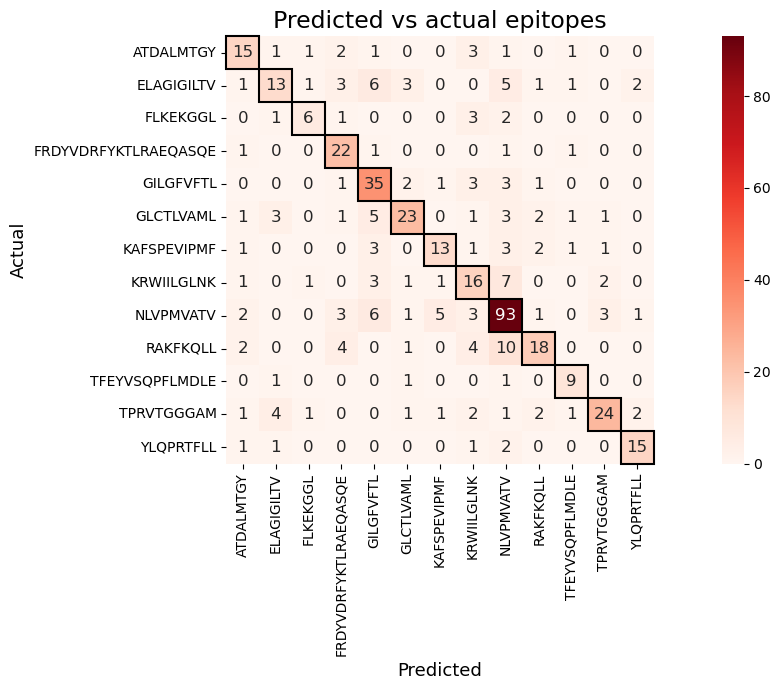

In [579]:
figure, axis = plt.subplots(nrows=1,figsize=(14,7))
sns.heatmap(metrics_holder['actual_vs_labeled_matrix'], annot=True, cmap='Reds', fmt='', square=True, annot_kws={"size": 12})
axis.set_xlabel('Predicted', fontsize=13)
axis.set_ylabel('Actual', fontsize=13)
axis.set_title('Predicted vs actual epitopes', fontsize=17)
for tick in axis.get_xticklabels():
        tick.set_rotation(90)


#Adding boxes to highlight when actual was same as predicted.
for epitopes in range(metrics_holder['actual_vs_labeled_matrix'].shape[0]):
    axis.add_patch(Rectangle((epitopes, epitopes), 1, 1, ec='black', fc='none', lw=1.5, clip_on=False))
plt.tight_layout()

# Plot of metrics for each epitope

Text(0.5, 1.0, 'Average accuracy: 0.638')

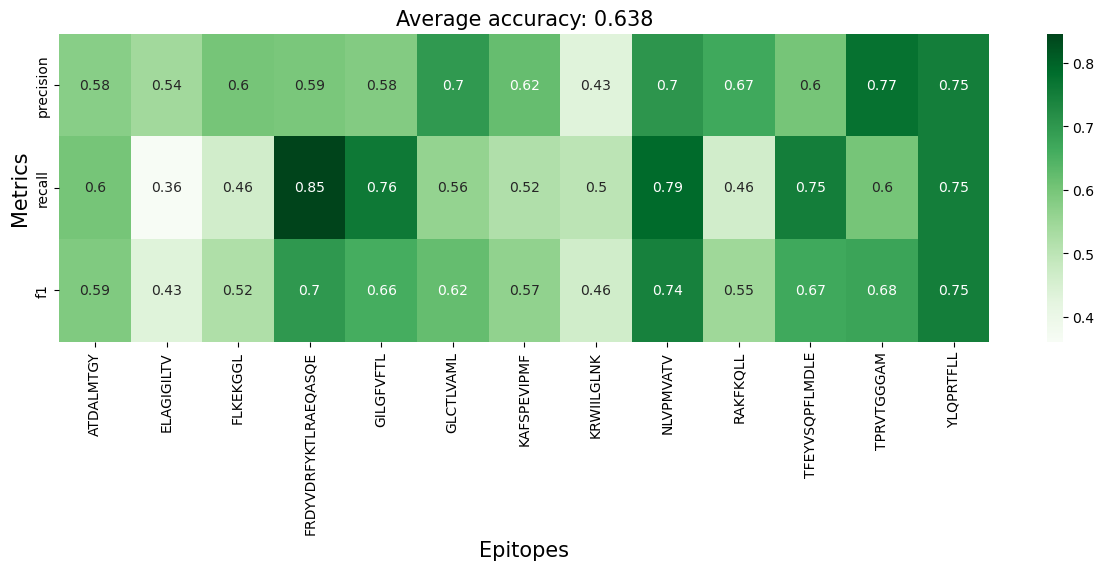

In [580]:
plt.figure(figsize=(15,4))
axis = sns.heatmap(metrics_table_df, annot=True, cmap='Greens' )
axis.set_ylabel('Metrics', fontsize=15)
axis.set_xlabel('Epitopes', fontsize=15)
axis.set_title(f"Average accuracy: {metrics_holder['accuracy']:.3f}", fontsize=15)
